### Goal of the case study

* The goal of the case study is to build a logistic regression model to predict lead score between 0 to 100. High lead score means conversion or 'hot' and low means no conversion or 'cold'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, r2_score, plot_roc_curve
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Read the leads data in .csv format as pandas dataframe

In [2]:
leaddf = pd.read_csv(r"C:\Users\riduv\Downloads\Leads.csv")

### Visualize rows and columns

In [3]:
leaddf.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened


### Check initial shape

In [4]:
leaddf.shape

(9240, 37)

### Data cleaning 

### check empty column names

In [5]:
leaddf.columns.isnull().sum()

0

**Impression:**
no empty columns names were identified

### Check duplicated rows and columns

In [6]:
leaddf[leaddf.duplicated()].shape

(0, 37)

In [7]:
leaddf.loc[:,leaddf.columns.duplicated()].shape

(9240, 0)

**Impression:**
No duplicated rows were identified

### Check datatype and properties of columns

In [8]:
leaddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [9]:
leaddf.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Check and fill/remove empty values rows/columns 

Calculate percentage of null values in each column of the two dataframe and remove those columns with greater than 40 percentage of null values


In [10]:
## replacing the word 'select' with nan values. so, null colums can be further removed

leaddf = leaddf.replace('Select', np.nan)

In [11]:
find_col_leaddf = (leaddf.isnull().sum()/leaddf.shape[0])*100
nan_cols_leaddf = find_col_leaddf[(find_col_leaddf != 0) & (find_col_leaddf >= 45)].index

print("Current application df columns with greater than 45% of null values: ", nan_cols_leaddf.shape[0])

Current application df columns with greater than 45% of null values:  7


#### Columns with percentage null values

In [12]:
find_col_leaddf

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

#### Columns with greater then 40% null values

In [13]:
nan_cols_leaddf

Index(['How did you hear about X Education', 'Lead Quality', 'Lead Profile',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')

### Drop columns

In [14]:
leaddf.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)

In [15]:
leaddf.drop(nan_cols_leaddf, axis=1, inplace=True)

**Impression**: removed 'Prospect ID', 'Lead Number' as these are identification numbers with no information for model. 'How did you hear about X Education', 'Lead Profile' 'Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score',  'Asymmetrique Profile Score' columns where dropped with greater than 45% null values.

In [16]:
## set of columns after removal with percentage of null values

(leaddf.isnull().sum()/leaddf.shape[0])*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

### Check final shape of dataframe

In [17]:
leaddf.shape

(9240, 28)

### Numerical and Categorical columns

#### Categorical columns

In [18]:
leaddf[leaddf.columns.difference(leaddf.describe().columns)].columns

Index(['A free copy of Mastering The Interview', 'City', 'Country',
       'Digital Advertisement', 'Do Not Call', 'Do Not Email',
       'Get updates on DM Content', 'I agree to pay the amount through cheque',
       'Last Activity', 'Last Notable Activity', 'Lead Origin', 'Lead Source',
       'Magazine', 'Newspaper', 'Newspaper Article',
       'Receive More Updates About Our Courses', 'Search', 'Specialization',
       'Tags', 'Through Recommendations', 'Update me on Supply Chain Content',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'X Education Forums'],
      dtype='object')

#### Numerical columns

In [19]:
leaddf.describe().columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')

### Handling outliers in numerical columns

Ploted are some of the columns with outliers

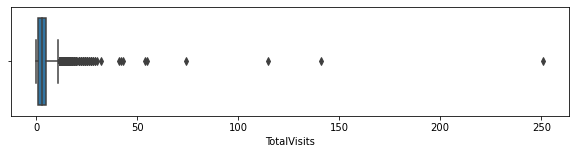

In [20]:
plt.figure(figsize=(10,2))
sns.boxplot(leaddf["TotalVisits"])
plt.show()

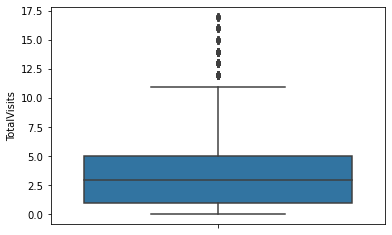

In [21]:
## total visits outlier removal

Q3 = leaddf.TotalVisits.quantile(0.99)
leaddf = leaddf[(leaddf.TotalVisits <= Q3)]
Q1 = leaddf.TotalVisits.quantile(0.01)
leaddf = leaddf[(leaddf.TotalVisits >= Q1)]
sns.boxplot(y=leaddf['TotalVisits'])
plt.show()

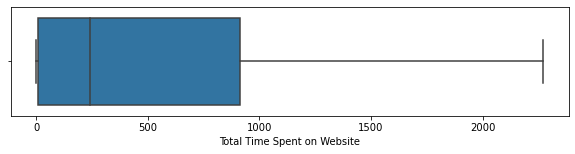

In [22]:
plt.figure(figsize=(10,2))
sns.boxplot(leaddf["Total Time Spent on Website"])
plt.show()

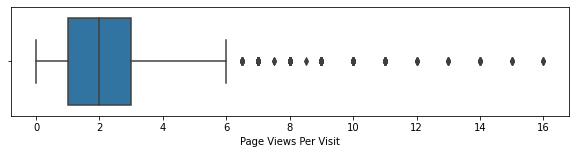

In [23]:
plt.figure(figsize=(10,2))
sns.boxplot(leaddf["Page Views Per Visit"])
plt.show()

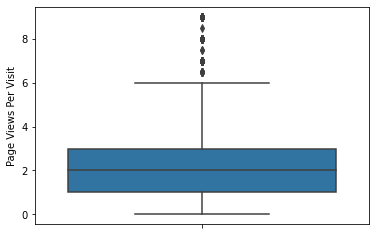

In [24]:
## Page Views Per Visit column outlier removal

Q3 = leaddf["Page Views Per Visit"].quantile(0.99)
leaddf = leaddf[(leaddf["Page Views Per Visit"] <= Q3)]
Q1 = leaddf["Page Views Per Visit"].quantile(0.01)
leaddf = leaddf[(leaddf["Page Views Per Visit"] >= Q1)]
sns.boxplot(y=leaddf["Page Views Per Visit"])
plt.show()

### Check correlations in numerical columns

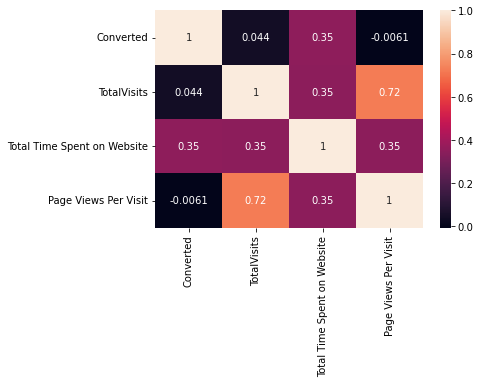

In [25]:
sns.heatmap(leaddf.corr(), annot=True)
plt.show()

### Checking data imbalance

In [26]:
leaddf.Converted.value_counts()

0    5558
1    3395
Name: Converted, dtype: int64

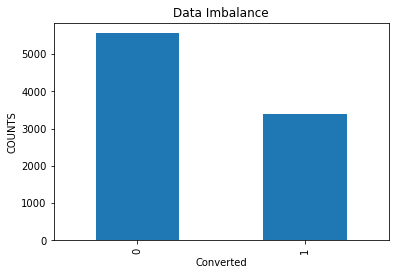

In [27]:
leaddf.Converted.value_counts().plot.bar()
plt.xlabel("Converted")
plt.ylabel("COUNTS")
plt.title("Data Imbalance")
plt.show()

**Impression** 
* There is a slight data imbalance with 3346 rows of converted (1) and 5487 rows of non converted (0).

### Analysis of categorical features

In [28]:
leaddf[leaddf.columns.difference(leaddf.describe().columns)].columns

Index(['A free copy of Mastering The Interview', 'City', 'Country',
       'Digital Advertisement', 'Do Not Call', 'Do Not Email',
       'Get updates on DM Content', 'I agree to pay the amount through cheque',
       'Last Activity', 'Last Notable Activity', 'Lead Origin', 'Lead Source',
       'Magazine', 'Newspaper', 'Newspaper Article',
       'Receive More Updates About Our Courses', 'Search', 'Specialization',
       'Tags', 'Through Recommendations', 'Update me on Supply Chain Content',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'X Education Forums'],
      dtype='object')

In [29]:
def Converted_or_not_percent(df, col):
    tot_dict = {0:{},1:{}}
    for i in df["Converted"].unique():
        nonan = df[col].unique()
        for j in nonan[~pd.isnull(nonan)]:
            perc = (df[(df["Converted"]==i) & (df[col]==j)].shape[0]/df[df[col]==j].shape[0])*100
            tot_dict[i][j] = perc
    tot_dict["Not_converted"],tot_dict["Converted"] = tot_dict.pop(0),tot_dict.pop(1)
    return tot_dict

#### Column 'Country'

In [30]:
leaddf['Country'].value_counts(dropna=False)

India                   6347
NaN                     2323
United States             68
United Arab Emirates      52
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
South Africa               4
Kuwait                     4
Germany                    4
unknown                    4
Nigeria                    4
Canada                     4
Sweden                     3
China                      2
Belgium                    2
Asia/Pacific Region        2
Uganda                     2
Italy                      2
Ghana                      2
Bangladesh                 2
Philippines                2
Liberia                    1
Vietnam                    1
Denmark                    1
Switzerland                1
Russia                     1
Netherlands                1
Malaysia      

In [31]:
## As observed majority of rows have india as city, so we can replace with 'India'

leaddf['Country'] = leaddf['Country'].replace(np.nan,'India')

In [32]:
leaddf['Country'].value_counts(dropna=False)/leaddf['Country'].shape[0]

India                   0.968390
United States           0.007595
United Arab Emirates    0.005808
Singapore               0.002681
Saudi Arabia            0.002346
United Kingdom          0.001675
Australia               0.001452
Qatar                   0.001117
Bahrain                 0.000782
Hong Kong               0.000782
Oman                    0.000670
France                  0.000670
Canada                  0.000447
unknown                 0.000447
South Africa            0.000447
Germany                 0.000447
Nigeria                 0.000447
Kuwait                  0.000447
Sweden                  0.000335
China                   0.000223
Bangladesh              0.000223
Belgium                 0.000223
Asia/Pacific Region     0.000223
Uganda                  0.000223
Philippines             0.000223
Italy                   0.000223
Ghana                   0.000223
Liberia                 0.000112
Vietnam                 0.000112
Denmark                 0.000112
Switzerlan

In [33]:
### we can drop the column as around 97% of the rows has india as country

leaddf.drop(['Country'], axis=1, inplace=True)

#### Column 'City'

In [34]:
leaddf['City'].value_counts(dropna=False)

NaN                            3578
Mumbai                         3109
Thane & Outskirts               723
Other Cities                    669
Other Cities of Maharashtra     438
Other Metro Cities              364
Tier II Cities                   72
Name: City, dtype: int64

In [35]:
## As observed majority of rows have mumbai, so we can replace with 'mumbai'

leaddf['City'] = leaddf['City'].replace(np.nan,'Mumbai')

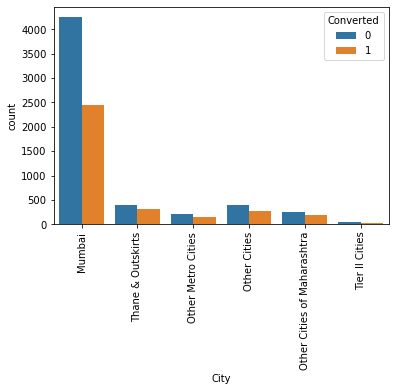

In [36]:
sns.countplot(x=leaddf["City"],hue=leaddf["Converted"])
plt.xticks(rotation=90)
plt.show()

#### Column 'What is your current occupation'

In [37]:
leaddf['What is your current occupation'].value_counts(dropna=False)

Unemployed              5410
NaN                     2643
Working Professional     667
Student                  204
Other                     13
Housewife                  9
Businessman                7
Name: What is your current occupation, dtype: int64

In [38]:
leaddf['What is your current occupation'].value_counts(dropna=False)/leaddf['What is your current occupation'].shape[0]

Unemployed              0.604267
NaN                     0.295208
Working Professional    0.074500
Student                 0.022786
Other                   0.001452
Housewife               0.001005
Businessman             0.000782
Name: What is your current occupation, dtype: float64

In [39]:
## As observed majority (60 %) of rows have Unemployed as occupation, so we can replace with 'Unemployed'

leaddf['What is your current occupation'] = leaddf['What is your current occupation'].replace(np.nan,'Unemployed')

In [40]:
Converted_or_not_percent(leaddf, 'What is your current occupation')

{'Not_converted': {'Unemployed': 66.5838817831864,
  'Student': 64.70588235294117,
  'Working Professional': 8.245877061469265,
  'Businessman': 42.857142857142854,
  'Other': 46.15384615384615,
  'Housewife': 0.0},
 'Converted': {'Unemployed': 33.416118216813615,
  'Student': 35.294117647058826,
  'Working Professional': 91.75412293853074,
  'Businessman': 57.14285714285714,
  'Other': 53.84615384615385,
  'Housewife': 100.0}}

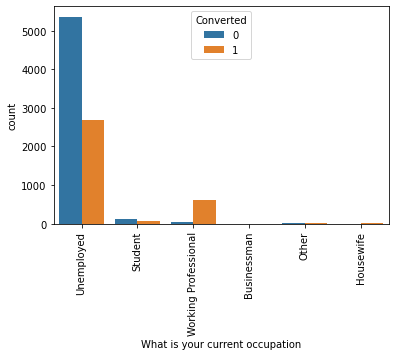

In [41]:
sns.countplot(x=leaddf['What is your current occupation'],hue=leaddf['Converted'])
plt.xticks(rotation=90)
plt.show()

**Impression** 
* Working professionals have higher chances of getting converted or hot lead. while, Unemployed have higher chances of not getting converted or cold

#### Column 'What is your current occupation'

In [42]:
leaddf['Specialization'].value_counts(dropna=False)/leaddf['Specialization'].shape[0]

NaN                                  0.366804
Finance Management                   0.105551
Human Resource Management            0.091589
Marketing Management                 0.091031
Operations Management                0.055289
Business Administration              0.043561
IT Projects Management               0.040210
Supply Chain Management              0.037753
Banking, Investment And Insurance    0.036301
Media and Advertising                0.022004
Travel and Tourism                   0.021110
International Business               0.019100
Healthcare Management                0.016866
E-COMMERCE                           0.011951
Hospitality Management               0.011951
Retail Management                    0.010611
Rural and Agribusiness               0.007819
E-Business                           0.006255
Services Excellence                  0.004244
Name: Specialization, dtype: float64

In [43]:
leaddf['Specialization'] = leaddf['Specialization'].replace(np.nan, 'Not Specified')

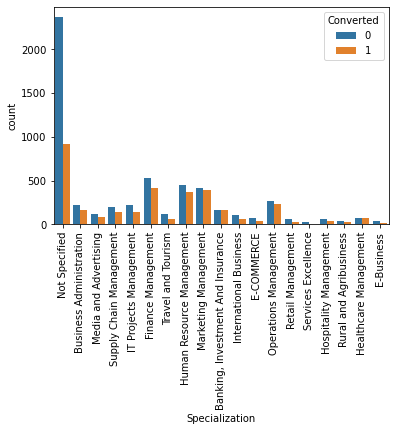

In [44]:
sns.countplot(x=leaddf['Specialization'],hue=leaddf['Converted'])
plt.xticks(rotation=90)
plt.show()

In [45]:
# As there many specialization related to management, can combine them into category 'Management_Studies'

leaddf['Specialization'] = leaddf['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Studies')  

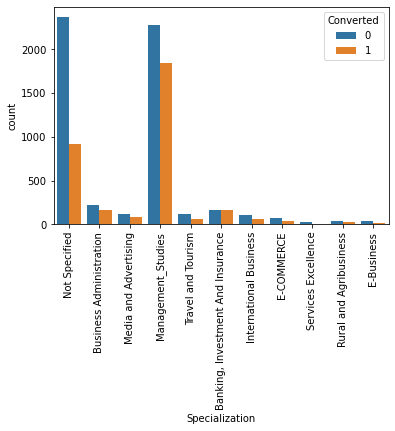

In [46]:
sns.countplot(x=leaddf['Specialization'],hue=leaddf['Converted'])
plt.xticks(rotation=90)
plt.show()

**Impression**
* It can be observed that majority of 'hot' leads have specialization related to management

#### Column 'Tags'

In [47]:
leaddf['Tags'].value_counts(dropna=False)

NaN                                                  3284
Will revert after reading the email                  2002
Ringing                                              1162
Interested in other courses                           505
Already a student                                     461
Closed by Horizzon                                    290
switched off                                          237
Busy                                                  183
Lost to EINS                                          169
Not doing further education                           137
Interested  in full time MBA                          116
Graduation in progress                                110
invalid number                                         81
Diploma holder (Not Eligible)                          63
wrong number given                                     46
opp hangup                                             33
number not provided                                    26
in touch with 

In [48]:
leaddf['Tags'] = leaddf['Tags'].replace(np.nan, 'Not Specified')

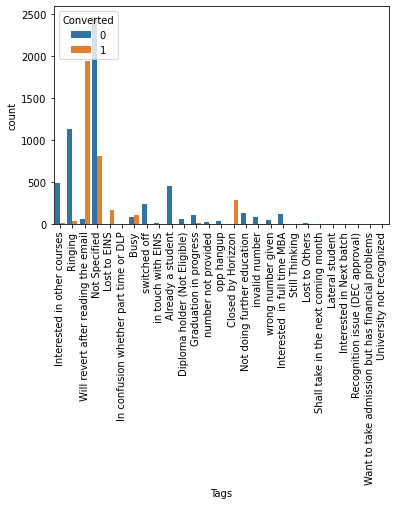

In [49]:
sns.countplot(x=leaddf['Tags'],hue=leaddf['Converted'])
plt.xticks(rotation=90)
plt.show()

In [50]:
## less than 50 occurences are grouped into one category

d = leaddf['Tags'].value_counts(dropna=False)
to_be_droped_cols = d[d < 50].index

leaddf['Tags'] = leaddf['Tags'].replace(to_be_droped_cols, 'Other_Tags')

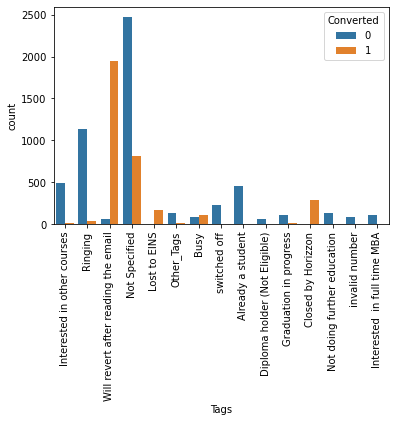

In [51]:
sns.countplot(x=leaddf['Tags'],hue=leaddf['Converted'])
plt.xticks(rotation=90)
plt.show()

#### Column 'What matters most to you in choosing a course'

In [52]:
leaddf['What matters most to you in choosing a course'].value_counts(dropna=False)/leaddf['What matters most to you in choosing a course'].shape[0]

Better Career Prospects      0.702558
NaN                          0.297219
Flexibility & Convenience    0.000112
Other                        0.000112
Name: What matters most to you in choosing a course, dtype: float64

In [53]:
# As this column provides no new information, we can drop this column

leaddf.drop(['What matters most to you in choosing a course'], axis=1, inplace=True)

#### Column ''Lead Origin''

In [54]:
leaddf['Lead Origin'].value_counts(dropna=False)/leaddf['Lead Origin'].shape[0]

Landing Page Submission    0.532671
API                        0.396068
Lead Add Form              0.067799
Lead Import                0.003463
Name: Lead Origin, dtype: float64

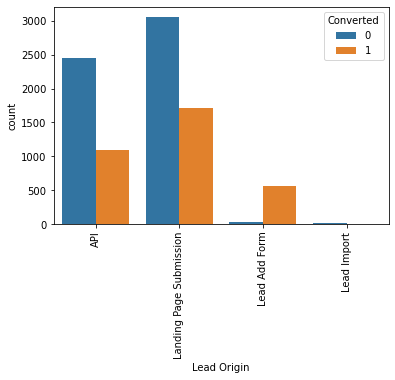

In [55]:
sns.countplot(x=leaddf['Lead Origin'],hue=leaddf['Converted'])
plt.xticks(rotation=90)
plt.show()

In [56]:
Converted_or_not_percent(leaddf, 'Lead Origin')

{'Not_converted': {'API': 68.97913141567965,
  'Landing Page Submission': 63.975676242398826,
  'Lead Add Form': 6.425041186161449,
  'Lead Import': 70.96774193548387},
 'Converted': {'API': 31.02086858432036,
  'Landing Page Submission': 36.024323757601174,
  'Lead Add Form': 93.57495881383855,
  'Lead Import': 29.03225806451613}}

**Impression**
* Lead add form showed a higher convertion, while, API showed lower convertion or hot leads

#### Column ''Lead Source''

In [57]:
leaddf['Lead Source'].value_counts(dropna=False)

Google               2836
Direct Traffic       2499
Olark Chat           1751
Organic Search       1092
Reference             442
Welingak Website      129
Referral Sites        117
Facebook               31
NaN                    29
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
Press_Release           1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [58]:
leaddf['Lead Source'] = leaddf['Lead Source'].replace(np.nan,'Others')
leaddf['Lead Source'] = leaddf['Lead Source'].replace('google','Google')
leaddf['Lead Source'] = leaddf['Lead Source'].replace('Facebook','Social Media')
leaddf['Lead Source'] = leaddf['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')

In [59]:
leaddf['Lead Source'].value_counts(dropna=False)

Google              2841
Direct Traffic      2499
Olark Chat          1751
Organic Search      1092
Reference            442
Welingak Website     129
Referral Sites       117
Others                47
Social Media          33
Live Chat              2
Name: Lead Source, dtype: int64

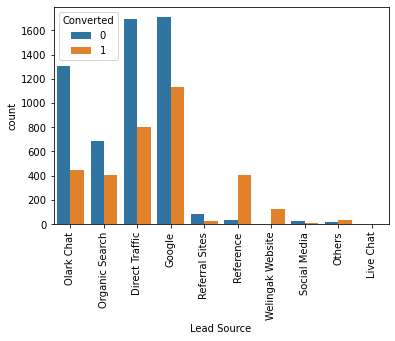

In [60]:
sns.countplot(x=leaddf['Lead Source'],hue=leaddf['Converted'])
plt.xticks(rotation=90)
plt.show()

In [61]:
Converted_or_not_percent(leaddf, 'Lead Source')

{'Not_converted': {'Olark Chat': 74.47173043974871,
  'Organic Search': 63.18681318681318,
  'Direct Traffic': 67.78711484593838,
  'Google': 60.15487504399859,
  'Referral Sites': 75.21367521367522,
  'Reference': 7.46606334841629,
  'Welingak Website': 1.550387596899225,
  'Social Media': 69.6969696969697,
  'Others': 31.914893617021278,
  'Live Chat': 0.0},
 'Converted': {'Olark Chat': 25.52826956025129,
  'Organic Search': 36.81318681318682,
  'Direct Traffic': 32.212885154061624,
  'Google': 39.84512495600141,
  'Referral Sites': 24.786324786324787,
  'Reference': 92.53393665158372,
  'Welingak Website': 98.44961240310077,
  'Social Media': 30.303030303030305,
  'Others': 68.08510638297872,
  'Live Chat': 100.0}}

**Impression**
* maximum lead come from google
* 'Reference','Welingak Website' and others showed higher conversion rates.
* maximum cold leads from Olark Chat, organic search, direct traffic, and google

#### Column 'A free copy of Mastering The Interview' and 'Last Notable Activity'

In [62]:
leaddf['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6155
Yes    2798
Name: A free copy of Mastering The Interview, dtype: int64

In [63]:
leaddf['Last Notable Activity'].value_counts(dropna=False)

Modified                        3224
Email Opened                    2789
SMS Sent                        2143
Page Visited on Website          288
Olark Chat Conversation          182
Email Link Clicked               170
Email Bounced                     59
Unsubscribed                      46
Unreachable                       32
Had a Phone Conversation          13
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [64]:
## less than 30 occurences are grouped into one category

d = leaddf['Last Notable Activity'].value_counts(dropna=False)
to_be_droped_cols = d[d < 60].index

leaddf['Last Notable Activity'] = leaddf['Last Notable Activity'].replace(to_be_droped_cols, 'Other_Notable_activity')

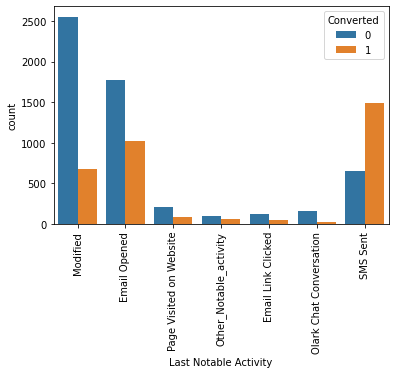

In [65]:
sns.countplot(x=leaddf['Last Notable Activity'],hue=leaddf['Converted'])
plt.xticks(rotation=90)
plt.show()

In [66]:
## Check null values in any columns

leaddf.isnull().sum()

Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Specialization                              0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Tags                                        0
Update me on Supply Chain Content           0
Get updates on DM Content         

#### Column 'Do Not Email'

In [67]:
leaddf['Do Not Email'].value_counts(dropna=False)

No     8256
Yes     697
Name: Do Not Email, dtype: int64

#### Imbalanced columns that can be dropped

In [68]:
leaddf['Do Not Call'].value_counts(dropna=False)

No     8951
Yes       2
Name: Do Not Call, dtype: int64

In [69]:
leaddf['Magazine'].value_counts(dropna=False)

No    8953
Name: Magazine, dtype: int64

In [70]:
leaddf['Newspaper Article'].value_counts(dropna=False)

No     8952
Yes       1
Name: Newspaper Article, dtype: int64

In [71]:
leaddf['Search'].value_counts(dropna=False)

No     8940
Yes      13
Name: Search, dtype: int64

In [72]:
leaddf['Newspaper'].value_counts(dropna=False)

No     8952
Yes       1
Name: Newspaper, dtype: int64

In [73]:
leaddf['Digital Advertisement'].value_counts(dropna=False)

No     8950
Yes       3
Name: Digital Advertisement, dtype: int64

In [74]:
leaddf['X Education Forums'].value_counts(dropna=False)

No    8953
Name: X Education Forums, dtype: int64

In [75]:
leaddf['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    8953
Name: Receive More Updates About Our Courses, dtype: int64

In [76]:
leaddf['Through Recommendations'].value_counts(dropna=False)

No     8947
Yes       6
Name: Through Recommendations, dtype: int64

In [77]:
leaddf['Get updates on DM Content'].value_counts(dropna=False)

No    8953
Name: Get updates on DM Content, dtype: int64

In [78]:
leaddf['Update me on Supply Chain Content'].value_counts(dropna=False)

No    8953
Name: Update me on Supply Chain Content, dtype: int64

In [79]:
leaddf['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    8953
Name: I agree to pay the amount through cheque, dtype: int64

In [80]:
## drop the above imbalanced columns

to_be_drop_cols = ['Do Not Call', 'Magazine', 'Newspaper Article', 'Search', 'Newspaper', 
                   'Digital Advertisement','X Education Forums', 'Receive More Updates About Our Courses',
                   'Through Recommendations','Get updates on DM Content', 'Update me on Supply Chain Content', 
                   'Do Not Call', 'I agree to pay the amount through cheque']

leaddf.drop(to_be_drop_cols, axis=1, inplace=True)

### Create dummy variable for categorical columns

In [81]:
## final categorical columns
leaddf[leaddf.columns.difference(leaddf.describe().columns)].columns

Index(['A free copy of Mastering The Interview', 'City', 'Do Not Email',
       'Last Activity', 'Last Notable Activity', 'Lead Origin', 'Lead Source',
       'Specialization', 'Tags', 'What is your current occupation'],
      dtype='object')

In [82]:
## final categorical columns
leaddf.describe().columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')

In [83]:
leaddf.shape

(8953, 14)

In [84]:
## dummy for 'Last Activity'

leaddf = pd.get_dummies(leaddf, columns=['Last Activity'], prefix  = 'Last Activity')

In [85]:
## dummy for 'Last Notable Activity'

leaddf = pd.get_dummies(leaddf, columns=['Last Notable Activity'], prefix  = 'Last Notable Activity')
leaddf.drop(['Last Notable Activity_Other_Notable_activity'], axis=1, inplace=True)

In [86]:
## dummy for 'Specialization'

leaddf = pd.get_dummies(leaddf, columns=['Specialization'], prefix  = 'Specialization')
leaddf.drop(['Specialization_Not Specified'], axis=1, inplace=True)

In [87]:
## dummy for 'What is your current occupation'

leaddf = pd.get_dummies(leaddf, columns=['What is your current occupation'], prefix  = 'What is your current occupation', drop_first=True)

In [88]:
## dummy for 'Lead Origin'

leaddf = pd.get_dummies(leaddf, columns=['Lead Origin'], prefix  = 'Lead Origin', drop_first=True)

In [89]:
## dummy for 'Lead Source'

leaddf = pd.get_dummies(leaddf, columns=['Lead Source'], prefix  = 'Lead Source')
leaddf.drop(['Lead Source_Others'], axis=1, inplace=True)

In [90]:
## dummy for 'Tags'

leaddf = pd.get_dummies(leaddf, columns=['Tags'], prefix  = 'Tags')
leaddf.drop(['Tags_Not Specified'], axis=1, inplace=True)

In [91]:
## dummy for 'A free copy of Mastering The Interview'

leaddf['A free copy of Mastering The Interview'] = leaddf['A free copy of Mastering The Interview'].apply(lambda x: 1 if x == 'Yes' else 0)
dummy = pd.get_dummies(leaddf, columns=['A free copy of Mastering The Interview'], prefix  = 'A free copy of Mastering The Interview')

In [92]:
## dummy for 'A free copy of Mastering The Interview'

leaddf['Do Not Email'] = leaddf['Do Not Email'].apply(lambda x: 1 if x == 'Yes' else 0)
dummy = pd.get_dummies(leaddf, columns=['Do Not Email'], prefix  = 'Do Not Email')

In [93]:
## dummy for 'City'

leaddf = pd.get_dummies(leaddf, columns=['City'], prefix  = 'City', drop_first=True)

In [94]:
## Current shape after adding dummies

leaddf.shape

(8953, 75)

### Train test split

#### remove target variable to split the data

In [95]:
targ_y = leaddf.pop('Converted')
indep_x = leaddf

xtrain,xtest,ytrain,ytest = train_test_split(indep_x, targ_y, test_size=0.2, random_state=20)

In [96]:
## shape of train and test dataset

xtrain.shape, xtest.shape

((7162, 74), (1791, 74))

### Normalization or scaling of columns

In [97]:
numerical_cols = xtrain.select_dtypes(include=['float64', 'int64']).columns

scaler = MinMaxScaler()

xtrain[numerical_cols] = scaler.fit_transform(xtrain[numerical_cols])

In [98]:
xtrain.describe()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,...,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
count,7162.000000,7162.000000,7162.000000,7162.000000,7162.000000,7162.000000,7162.000000,7162.000000,7162.000000,7162.000000,...,7162.000000,7162.000000,7162.000000,7162.000000,7162.000000,7162.000000,7162.000000,7162.000000,7162.000000,7162.000000
mean,0.077213,0.184585,0.210864,0.250708,0.314717,0.000559,0.048171,0.034069,0.030159,0.000279,...,0.016755,0.129712,0.223122,0.009076,0.027227,0.076096,0.048590,0.040352,0.080843,0.008238
std,0.266948,0.170534,0.239799,0.209488,0.464435,0.023628,0.214142,0.181418,0.171037,0.016710,...,0.128361,0.336010,0.416369,0.094840,0.162756,0.265170,0.215024,0.196797,0.272613,0.090395
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.058824,0.002641,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.176471,0.106074,0.222222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.235294,0.402289,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [99]:
xtrain

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,...,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
8609,0.0,0.470588,0.089349,0.888889,1.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4355,0.0,0.000000,0.000000,0.000000,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7570,0.0,0.235294,0.162852,0.444444,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
570,0.0,0.294118,0.180018,0.555556,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
447,0.0,0.000000,0.000000,0.000000,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6112,0.0,0.176471,0.321303,0.333333,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4057,0.0,0.000000,0.000000,0.000000,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7301,0.0,0.411765,0.186180,0.777778,1.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7635,1.0,0.058824,0.151849,0.111111,1.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


### Training the model

we will only use essential columns for our final model, in the process eliminate will some columns.

In [100]:
## create function for repetative tasks

def create_model(cols):
    xtrain_sm = sm.add_constant(xtrain[cols])
    lr = sm.GLM(ytrain, xtrain_sm, family = sm.families.Binomial())
    lr_model = lr.fit()
    print(lr_model.summary())
    return lr_model

def vifs(cols):
    df = xtrain[cols]
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

### Use RFE to get initial set of columns (Automated + Manual)

In [101]:
log_reg_model = LogisticRegression()
log_reg_model.fit(xtrain,ytrain)

LogisticRegression()

we will select initial 15 set of columns

In [102]:
rfe = RFE(log_reg_model,n_features_to_select=15, step=1)
rfe.fit(xtrain,ytrain)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [103]:
rfe.support_

array([False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True, False,  True,  True, False, False,  True,  True,
        True, False,  True,  True,  True,  True, False, False, False,
       False, False])

In [104]:
list(zip(xtrain.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', False, 7),
 ('TotalVisits', False, 11),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 38),
 ('Last Activity_Approached upfront', False, 42),
 ('Last Activity_Converted to Lead', False, 20),
 ('Last Activity_Email Bounced', False, 19),
 ('Last Activity_Email Link Clicked', False, 35),
 ('Last Activity_Email Marked Spam', False, 51),
 ('Last Activity_Email Opened', False, 44),
 ('Last Activity_Email Received', False, 55),
 ('Last Activity_Form Submitted on Website', False, 37),
 ('Last Activity_Had a Phone Conversation', False, 52),
 ('Last Activity_Olark Chat Conversation', False, 17),
 ('Last Activity_Page Visited on Website', False, 21),
 ('Last Activity_Resubscribed to emails', False, 53),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', False, 43),
 ('Last Activity_Unsubscribed', False, 28),
 ('Last Activity_View in browser link Clicked', False, 50),
 ('Last Acti

In [105]:
## columns selected by RFE
xtrain.columns[rfe.support_]

Index(['Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity_SMS Sent', 'Last Notable Activity_Modified',
       'Lead Source_Welingak Website', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Diploma holder (Not Eligible)',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off'],
      dtype='object')

In [106]:
xtrain_after_rfe = xtrain[xtrain.columns[rfe.support_]]

In [107]:
## shape after RFE

xtrain_after_rfe.shape

(7162, 15)

In [108]:
xtrain_after_rfe.shape , ytrain.shape

((7162, 15), (7162,))

<AxesSubplot:>

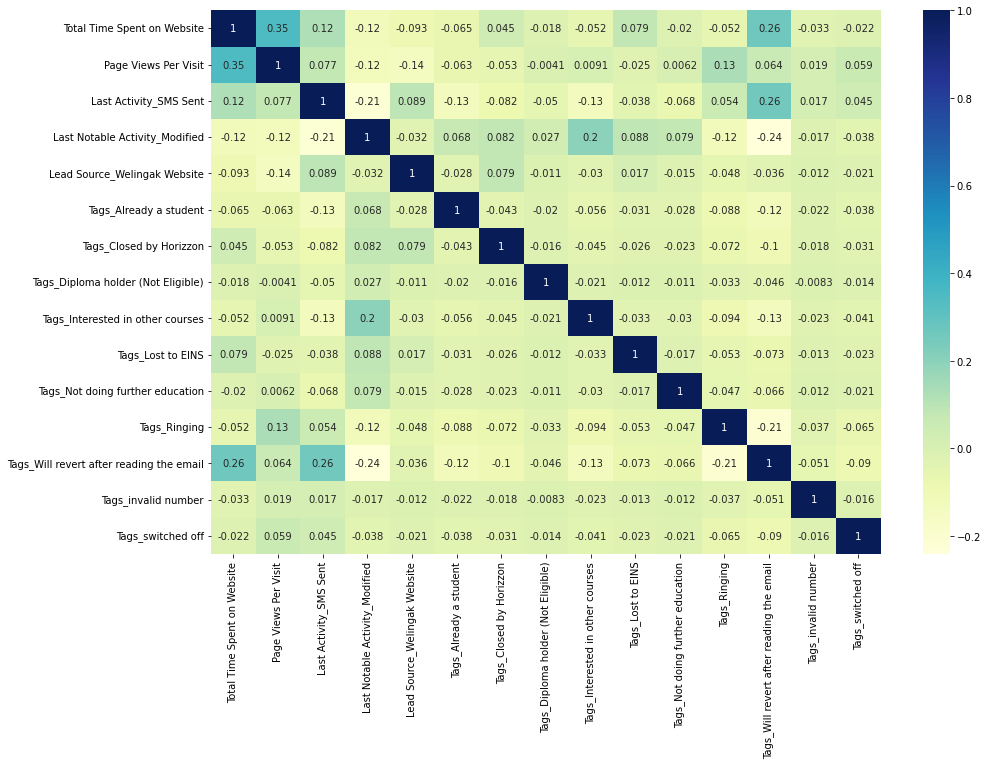

In [109]:
plt.figure(figsize = (15,10))
sns.heatmap(xtrain_after_rfe.corr(),cmap='YlGnBu', annot=True)

### Build model

#### Model 1

In [110]:
cols = xtrain.columns[rfe.support_]

model1 = create_model(cols)
vifs(cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7162
Model:                            GLM   Df Residuals:                     7146
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1448.7
Date:                Tue, 24 Jan 2023   Deviance:                       2897.4
Time:                        18:39:40   Pearson chi2:                 9.82e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6025
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

Columns 'Tags_Diploma holder (Not Eligible)', 'Tags_invalid number', 'Tags_Not doing further education' can be dropped as they are high p-value

In [111]:
cols = cols.drop(['Tags_Diploma holder (Not Eligible)', 'Tags_invalid number', 'Tags_Not doing further education'],1)

#### Model 2

In [112]:
model2 = create_model(cols)
vifs(cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7162
Model:                            GLM   Df Residuals:                     7149
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1493.4
Date:                Tue, 24 Jan 2023   Deviance:                       2986.8
Time:                        18:39:41   Pearson chi2:                 9.91e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5975
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

Now these set of columns and model 2 can be considered as final model as the p-values of all independent variables are almost zero and no high VIF variables or multi-colinearity.

### Final Model

In [113]:
## final set of columns

final_cols = cols

log_reg_final = LogisticRegression()
log_reg_final.fit(xtrain[final_cols],ytrain)

print(log_reg_final.intercept_,log_reg_final.coef_)

[-1.72770564] [[ 3.4727506  -1.9874782   1.92726752 -1.5687138   3.65839888 -2.80832355
   5.90317178 -1.64812582  4.76300151 -2.9042506   4.64641271 -2.92598081]]


### Evaluation

In [114]:
ypred = log_reg_final.predict_proba(xtrain[cols])

In [115]:
pred_final = pd.DataFrame({'Actual_Converted':ytrain,'Pred_Converted_Prob':ypred[:,1]})

In [116]:
pred_final['Pred_Converted'] = pred_final.Pred_Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [117]:
pred_final

,Actual_Converted,Pred_Converted_Prob,Pred_Converted
8609,0,0.039770,0
4355,0,0.150881,0
7570,1,0.989315,1
570,0,0.099150,0
447,1,0.907983,1
...,...,...,...
6112,1,0.966819,1
4057,1,0.931295,1
7301,0,0.026495,0
7635,0,0.003024,0


#### Confusion matrix

In [118]:
confusion_mat = confusion_matrix(pred_final.Actual_Converted, pred_final.Pred_Converted)
confusion_mat

array([[4269,  179],
       [ 354, 2360]], dtype=int64)

In [119]:
TP,TN,FP,FN = confusion_mat[1,1],confusion_mat[0,0],confusion_mat[0,1],confusion_mat[1,0]

In [120]:
## Sensitivity of the logistic regression model

sensitivity = TP/(TP+FN)
print('Sensitivity: ',sensitivity)

## Specificity of the logistic regression model

specificity = TN/(TN+FP)
print('Specificity: ',specificity)

Sensitivity:  0.8695652173913043
Specificity:  0.9597571942446043


#### Accuracy score on training data

In [121]:
accuracy_score(pred_final.Actual_Converted, pred_final.Pred_Converted)

0.9255794470818207

#### ROC curve 

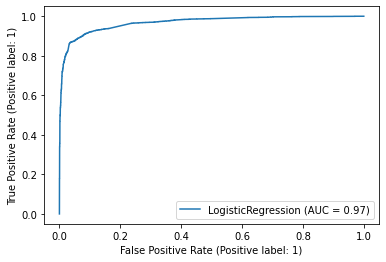

In [122]:
plot_roc_curve(log_reg_final, xtrain[final_cols], ytrain)
plt.show()

#### Decide Cut-off 

In [123]:
df_for_cutoff = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    pred_final['Pred_Converted'] = pred_final.Pred_Converted_Prob.map(lambda x: 1 if x > i else 0)
    cm = confusion_matrix(pred_final.Actual_Converted, pred_final.Pred_Converted)
    speci = cm[0,0]/(cm[0,0]+cm[0,1])
    sensi = cm[1,1]/(cm[1,0]+cm[1,1])
    df_for_cutoff.loc[i] =[i,accuracy_score(pred_final.Actual_Converted, pred_final.Pred_Converted),sensi,speci]

In [124]:
df_for_cutoff

,prob,accuracy,sensi,speci
0.0,0.0,0.378944,1.000000,0.000000
0.1,0.1,0.785814,0.973102,0.671538
0.2,0.2,0.901145,0.926308,0.885791
0.3,0.3,0.913991,0.908990,0.917041
0.4,0.4,0.918738,0.889831,0.936376
0.5,0.5,0.925579,0.869565,0.959757
0.6,0.6,0.914828,0.815402,0.975495
0.7,0.7,0.910221,0.792557,0.982014
0.8,0.8,0.899190,0.754606,0.987410
0.9,0.9,0.877827,0.691231,0.991682


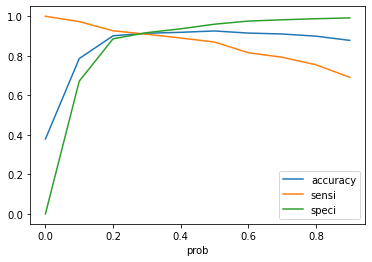

In [125]:
df_for_cutoff.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As seen above, 0.3 can be considered as a good cut-off as **'accuracy', 'sensitivity', 'specificity'** have optimum values with **0.9141, 0.9011, 0.9170** respectively

In [126]:
pred_final['Pred_Converted'] = pred_final.Pred_Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)
pred_final['Lead Score'] = pred_final.Pred_Converted_Prob.map(lambda x: round(x*100, 2))
pred_final

,Actual_Converted,Pred_Converted_Prob,Pred_Converted,Lead Score
8609,0,0.039770,0,3.98
4355,0,0.150881,0,15.09
7570,1,0.989315,1,98.93
570,0,0.099150,0,9.92
447,1,0.907983,1,90.80
...,...,...,...,...
6112,1,0.966819,1,96.68
4057,1,0.931295,1,93.13
7301,0,0.026495,0,2.65
7635,0,0.003024,0,0.30


### Scaling and prediction on test data 

In [127]:
numerical_cols = xtest.select_dtypes(include=['float64', 'int64']).columns
xtest[numerical_cols] = scaler.transform(xtest[numerical_cols])

In [128]:
xtest = xtest[final_cols]
xtest.head()

,Total Time Spent on Website,Page Views Per Visit,Last Activity_SMS Sent,Last Notable Activity_Modified,Lead Source_Welingak Website,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
4916,0.000000,0.000000,0,1,0,0,0,0,0,0,0,0
1890,0.074384,0.222222,0,0,0,0,0,0,0,0,0,0
6941,0.031690,0.111111,0,0,0,0,0,1,0,0,0,0
7184,0.054577,0.277778,0,1,0,1,0,0,0,0,0,0
9043,0.082306,0.222222,1,0,0,0,0,0,0,0,1,0


In [129]:
ytest_pred = log_reg_final.predict_proba(xtest)

In [130]:
pred_test_final = pd.DataFrame({'Actual_Converted':ytest,'Pred_Converted_Prob':ytest_pred[:,1]})

In [131]:
pred_test_final['Pred_Converted'] = pred_test_final.Pred_Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [132]:
pred_test_final.head()

,Actual_Converted,Pred_Converted_Prob,Pred_Converted
4916,0,0.035694,0
1890,0,0.128863,0
6941,0,0.029696,0
7184,0,0.001551,0
9043,1,0.990898,1


#### Accuracy and confusion matrix on test data

In [133]:
accuracy_score(pred_test_final.Actual_Converted, pred_test_final.Pred_Converted)

0.9240647682858738

In [134]:
confusion_mat_test = confusion_matrix(pred_test_final.Actual_Converted, pred_test_final.Pred_Converted)
confusion_mat_test

array([[1068,   42],
       [  94,  587]], dtype=int64)

In [135]:
TP,TN,FP,FN = confusion_mat_test[1,1],confusion_mat_test[0,0],confusion_mat_test[0,1],confusion_mat_test[1,0]

In [136]:
## Sensitivity of the logistic regression model

sensitivity = TP/(TP+FN)
print('Sensitivity: ',sensitivity)

## Specificity of the logistic regression model

specificity = TN/(TN+FP)
print('Specificity: ',specificity)

Sensitivity:  0.8619676945668135
Specificity:  0.9621621621621622


**'accuracy', 'sensitivity', 'specificity'** on test data are **0.9241, 0.8621, 0.9621** respectively

### Final model results

* **Train Data** - **'accuracy', 'sensitivity', 'specificity'** - **0.9141, 0.9011, 0.9170** 
* **Test Data** - **'accuracy', 'sensitivity', 'specificity'** - **0.9241, 0.8621, 0.9621**

The model is giving promising results as shown by above evaluation metrics Hence, this should help make identify hot lead and significantly impact the business.